In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iterno_orig=np.loadtxt("iterno_orig.dat")
iterno_apio=np.loadtxt("iterno_apio.dat")
no=iterno_orig[0]
for i in range(len(iterno_orig)):
    if (iterno_orig[i]!=no):
        iterno_orig[i]=iterno_orig[i]-1

In [3]:
print(iterno_orig)
print(iterno_apio)

[99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]
[99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 98. 99. 99. 99. 99. 99. 99.]


In [4]:
print(sum(iterno_orig))
print(sum(iterno_apio))

1584.0
1682.0


In [5]:
apio_io=np.loadtxt("apio_io.dat")
orig_io=np.loadtxt("orig_io.dat")

if len(apio_io)>len(orig_io):
    apio_io=np.delete(apio_io,np.where(iterno_orig!=no)[0])
elif len(apio_io)<len(orig_io):
    orig_io=np.delete(orig_io,np.where(iterno_apio!=no)[0])

In [6]:
print(len(orig_io))
print(len(apio_io))

16
16


In [7]:
orig_io_step=np.loadtxt("orig_io_step.dat")
orig_comp_step=np.loadtxt("orig_comp_step.dat")
apio_io_step=np.loadtxt("apio_io_step.dat")

In [8]:
print(len(orig_comp_step))
print(len(orig_io_step))

1584
1584


In [9]:
#i1=np.where(iterno_orig!=no)[0][0]
#i2=np.where(iterno_orig!=no)[0][1]
#if len(orig_comp_step)>len(orig_io_step):   
#    orig_comp_step=np.delete(orig_comp_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])
#elif len(orig_comp_step)<len(orig_io_step):
#    orig_io_step=np.delete(orig_io_step,[int(no*i1+iterno_orig[i1]), int(no*(i2-1)+iterno_orig[i1]+iterno_orig[i2])])

Text(0.5, 0, 'iteration')

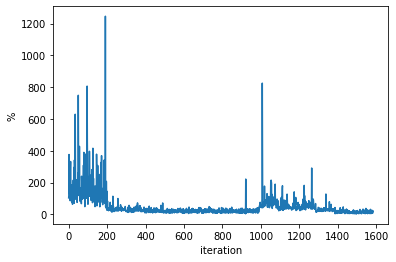

In [10]:
vec2=(orig_comp_step/orig_io_step)*100
plt.plot(vec2)
plt.ylabel("%")
plt.xlabel("iteration")

In [11]:
l1=len(orig_io_step)
l2=len(apio_io_step)
diff=l1-l2

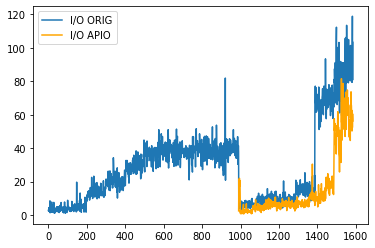

In [12]:
#fig,ax=plt.subplots(1,2,figsize=(20,5))
x1=np.linspace(0,l1,l1)
x2=np.linspace(diff,l1,l2)
plt.plot(x1,orig_io_step,label="I/O ORIG")
plt.plot(x2,apio_io_step,label="I/O APIO",c="orange")
plt.legend()
#ax[0].legend()
#ax[1].legend()

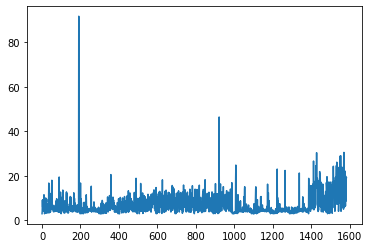

In [13]:
plt.plot(orig_comp_step,label="COMP ORIG")

(-2.0, 17.0)

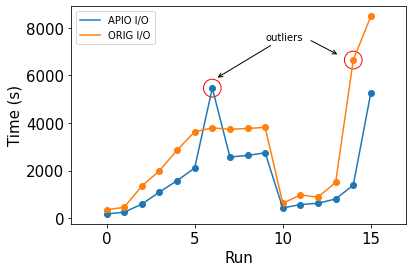

In [14]:
import matplotlib.patches as mpatches
fig,ax=plt.subplots()
p = mpatches.Ellipse((6,apio_io[6]), width=1,height=750,fill=0,color='r')
ax.add_patch(p)
ax.plot()
ax.plot(apio_io, label="APIO I/O")
ax.scatter(np.linspace(0,15,16),apio_io)
ax.plot(orig_io,label="ORIG I/O")
ax.scatter(np.linspace(0,15,16),orig_io)
ax.legend()
ax.set_ylabel("Time (s)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.annotate(text='outliers', xy=(6.2,apio_io[6]+400), xytext=(9,apio_io[6]+2000), arrowprops=dict(arrowstyle='->'))
q = mpatches.Ellipse((14,orig_io[14]), width=1,height=750,fill=0,color='r')
ax.add_patch(q)
ax.plot()
ax.annotate(text='', xy=(13.2,orig_io[14]+200), xytext=(11.5,7500), arrowprops=dict(arrowstyle='->'))

ax.set_xlim(-2,17)


In [15]:
np.linspace(7,15,9)[0:3]

array([7., 8., 9.])

[]

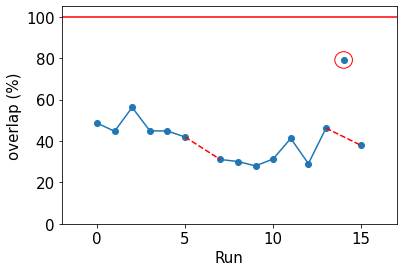

In [16]:

vec=(orig_io-apio_io)*100/orig_io
fig,ax=plt.subplots()
ax.plot(vec[0:6])

ax.scatter(np.linspace(0,5,6),vec[0:6])
ax.plot(np.linspace(7,13,7),vec[7:14],c='tab:blue')
ax.scatter(np.linspace(7,15,9),vec[7:16],c='tab:blue')
ax.axhline(100,-1,9,c='r')
ax.set_ylabel("overlap (%)",fontsize=15)
ax.set_xlabel("Run",fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim(0,105)
ax.set_xlim(-2,17)
ax.plot([5,7],[vec[5],vec[7]],c='r',ls='dashed')
ax.plot([13,15],[vec[13],vec[15]],c='r',ls='dashed')
q = mpatches.Ellipse((14,vec[14]), width=1,height=8,fill=0,color='r')
ax.add_patch(q)
ax.plot()

In [17]:
vector=vec[[0,1,2,3,4,5,7,8,9,10,11,12,13,15]]
print("mean:",np.mean(vector))
print("std:",np.std(vector))
print("max:",np.max(vector))
print("min:",np.min(vector))

mean: 39.709294372304875
std: 8.343731183700298
max: 56.2345751792751
min: 27.943800845139425


[array([48.7111045 , 44.6516274 , 56.23457518, 44.91188263, 44.80847234,
        41.91293317]),
 array([31.05063016, 30.0778173 ])]

In [23]:
avg=[]
err=[]
acc=0
for i in iterno_orig[iterno_orig==no]:
    interval=vec2[acc:acc+int(i)]
    avg.append(sum(interval)/int(i))
    err.append(1.96*(np.std(interval)/np.sqrt(int(i))))
    acc+=int(i)
avg=np.asarray(avg)

In [18]:
avg
len(avg)

16

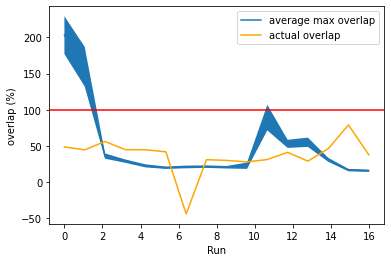

In [19]:
fig,ax=plt.subplots()
x=np.linspace(0,16,len(avg))
ax.plot(x,avg,label="average max overlap")
ax.fill_between(x, avg-err, avg+err)
ax.plot(x, vec,c="orange",label="actual overlap")
ax.set_ylabel("overlap (%)")
ax.set_xlabel("Run")
ax.legend()
ax.axhline(100,0,16,c="r")